In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,optimizers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
batch_size =32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("plant.village",
                                                  shuffle=True,
                                                    image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                  batch_size=batch_size)

KeyboardInterrupt: 

In [ ]:
class_names=dataset.class_names
class_names


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
len(dataset)

932

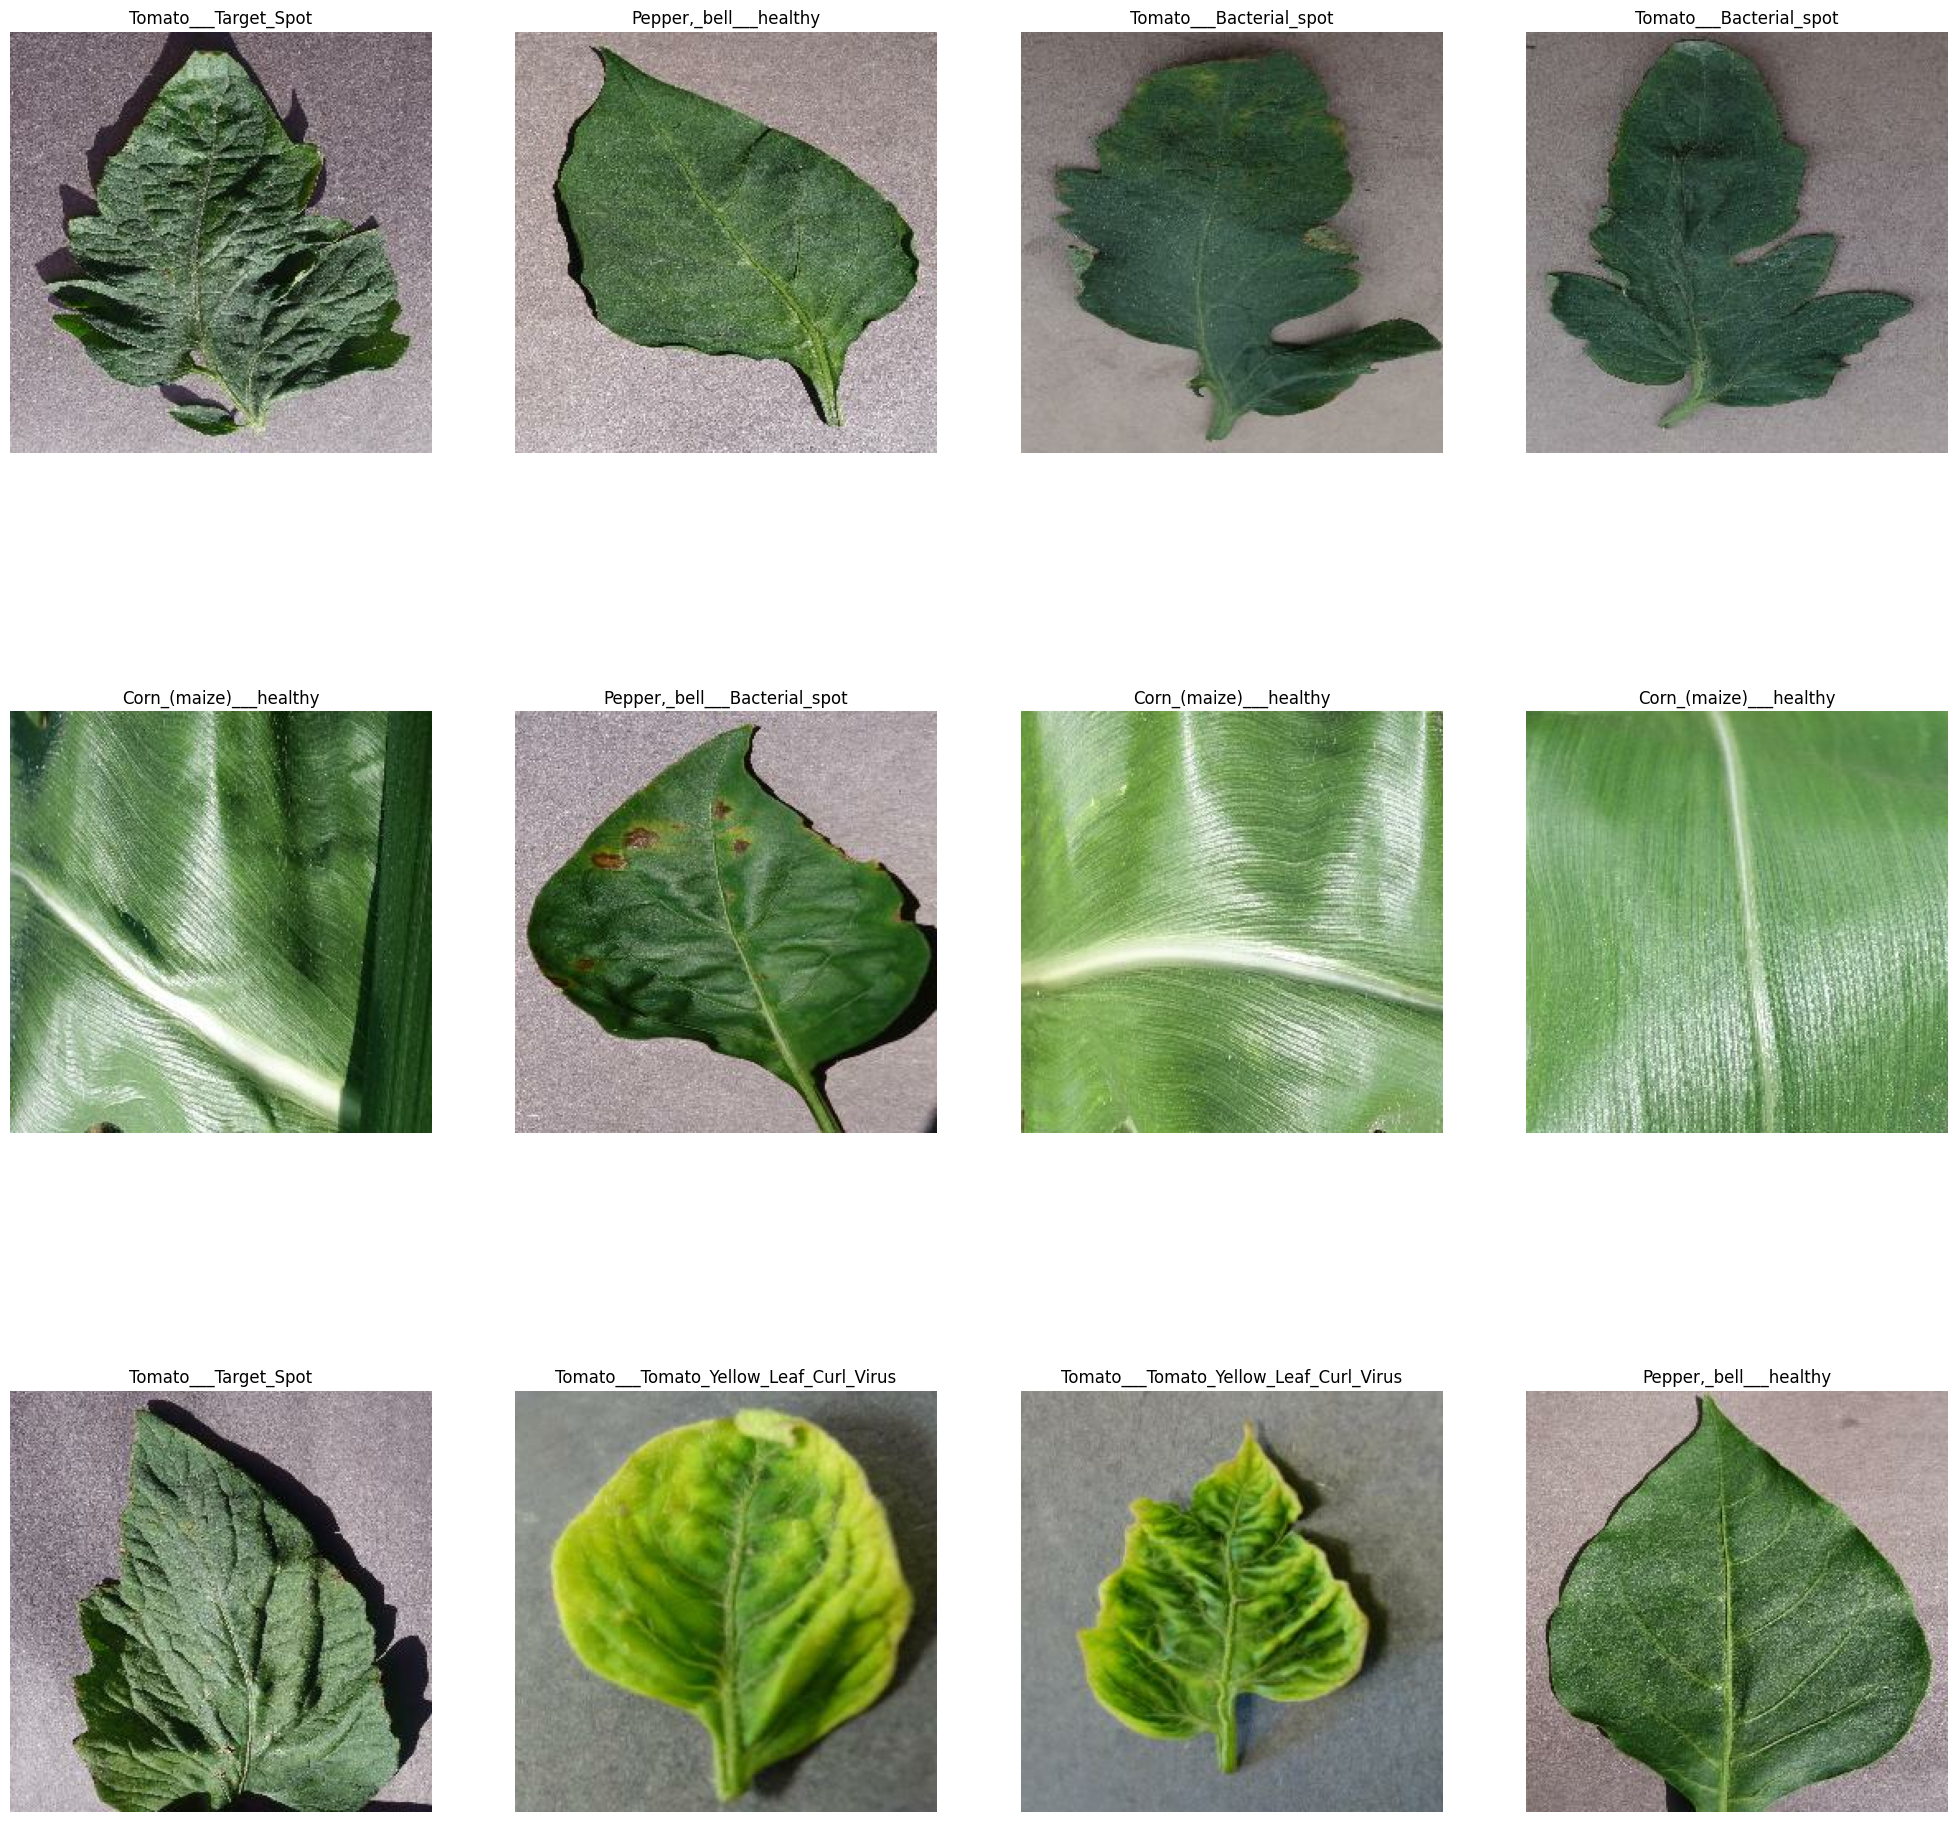

In [ ]:
plt.figure(figsize=(25,25))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [ ]:
def dataset_partitions_tf(ds, train_split=.8,test_split=.1,val_split=.1, shuffle= True, shufle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds= ds.shuffle(shufle_size, seed=15)
    train_size= int(ds_size*train_split)
    test_size=int(ds_size *test_split)
    val_size=int(ds_size*val_split)
    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size).take (test_size)
    val_ds=ds.skip(train_size).take(val_size)
    return train_ds,test_ds,val_ds

In [ ]:
train_ds,test_ds,val_ds=dataset_partitions_tf(dataset)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
len(train_ds)

745

In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
    layers.experimental.preprocessing.RandomContrast(0.2)
])


In [ ]:

# Define hyperparameters
#input_size = (224, 224, 3)
CHANNELS=3
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 23
learning_rate = 0.001
batch_size = 32
epoch = 15


In [ ]:
"""model = models.Sequential([
    layers.InputLayer(input_shape=input_shape ),
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape)
"""

"model = models.Sequential([\n    layers.InputLayer(input_shape=input_shape ),\n    resize_rescale,\n    data_augmentation,\n    layers.Conv2D(32, (3,3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(64, (3,3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(128, (3,3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(256, (3,3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2,2)),\n    layers.Flatten(),\n    layers.Dense(512, activation='relu'),\n    layers.BatchNormalization(),\n    layers.Dense(num_classes, activation='softmax')\n])\n\nmodel.build(input_shape=input_shape)\n"

In [ ]:
"""import tensorflow as tf
from tensorflow.keras import layers, models

IMAGE_SIZE = 32
CHANNELS = 3
num_classes = 23
learning_rate = 0.001
batch_size = 32
epochs = 50

input_shape = (batch_size, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape)
"""

"import tensorflow as tf\nfrom tensorflow.keras import layers, models\n\nIMAGE_SIZE = 32\nCHANNELS = 3\nnum_classes = 23\nlearning_rate = 0.001\nbatch_size = 32\nepochs = 50\n\ninput_shape = (batch_size, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)\n\nmodel = models.Sequential([\n    layers.InputLayer(input_shape=input_shape),\n    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Flatten(),\n    layers.Dense(512, activation='relu'),\n    layers.BatchNormalization(),\n    layers.Dense(num_classes, activatio

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

CHANNELS = 3
num_classes = 23
learning_rate = 0.001
batch_size = 32
epochs = 15

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([

    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)




In [ ]:
"""import tensorflow as tf
from tensorflow.keras import layers, models

IMAGE_SIZE = 255
CHANNELS = 3
num_classes = 23
learning_rate = 0.001
batch_size = 32
epochs = 50

input_shape = (batch_size, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape)
"""

"import tensorflow as tf\nfrom tensorflow.keras import layers, models\n\nIMAGE_SIZE = 255\nCHANNELS = 3\nnum_classes = 23\nlearning_rate = 0.001\nbatch_size = 32\nepochs = 50\n\ninput_shape = (batch_size, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)\n\nmodel = models.Sequential([\n    layers.InputLayer(input_shape=input_shape),\n    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Flatten(),\n    layers.Dense(512, activation='relu'),\n    layers.BatchNormalization(),\n    layers.Dense(num_classes, activati

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=epoch,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/15
745/745 [==============================] - 3345s 4s/step - loss: 0.9950 - accuracy: 0.6935 - val_loss: 1.1746 - val_accuracy: 0.6294
Epoch 2/15
745/745 [==============================] - 3279s 4s/step - loss: 0.5347 - accuracy: 0.8259 - val_loss: 0.3763 - val_accuracy: 0.8679
Epoch 3/15
745/745 [==============================] - 4128s 6s/step - loss: 0.5313 - accuracy: 0.8289 - val_loss: 0.6449 - val_accuracy: 0.7897
Epoch 4/15
745/745 [==============================] - 4625s 6s/step - loss: 0.3957 - accuracy: 0.8675 - val_loss: 1.2924 - val_accuracy: 0.6929
Epoch 5/15
745/745 [==============================] - 4539s 6s/step - loss: 0.4257 - accuracy: 0.8611 - val_loss: 0.2336 - val_accuracy: 0.9247
Epoch 6/15
745/745 [==============================] - 4582s 6s/step - loss: 0.2855 - accuracy: 0.9034 - val_loss: 0.2200 - val_accuracy: 0.9288
Epoch 7/15
745/745 [==============================] - 4630s 6s/step - loss: 0.2153 - accuracy: 0.9277 - val_loss: 0.1899 - val_accuracy:

scores

In [ ]:
scores=model.evaluate(test_ds)
scores

93/93 [==============================] - 146s 856ms/step - loss: 0.0436 - accuracy: 0.9886


[0.04356144368648529, 0.988575279712677]

In [ ]:
history.params


{'verbose': 1, 'epochs': 15, 'steps': 745}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']

loss= history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Loss')

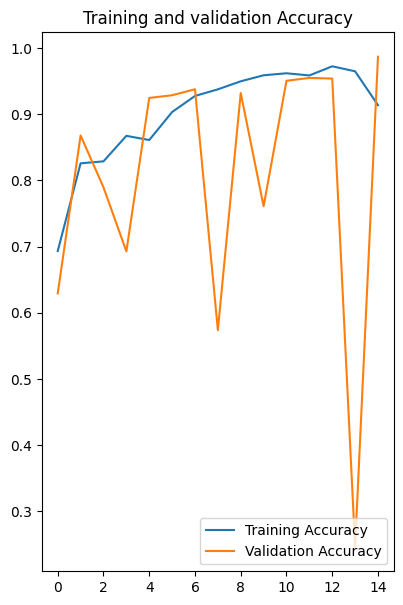

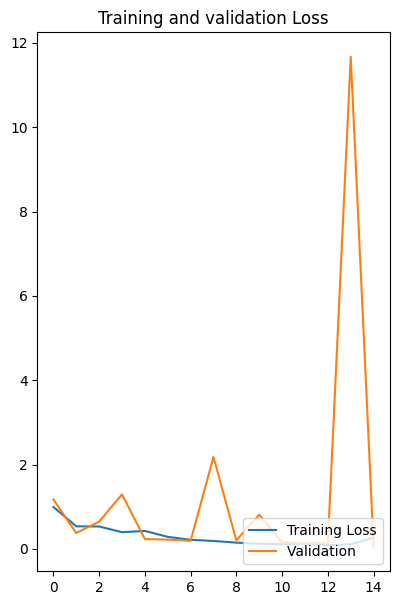

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs),val_loss, label='Validation ')
plt.legend(loc='lower right')
plt.title('Training and validation Loss')

first image to predict
fisrt image's actual label: Tomato___Target_Spot
1/1 [==============================] - 2s 2s/step
predictd label: Tomato___Target_Spot


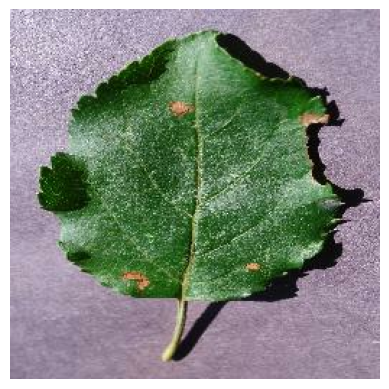

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0]

    print('first image to predict')
    plt.imshow(first_image)
    print("fisrt image's actual label:",class_names[first_label])
    plt.axis('off')
    batch_prediction=model.predict(image_batch)
    print("predictd label:",class_names[np.argmax(batch_prediction[0])]) 

In [ ]:
def prediction(model, img):
    img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array =tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class= class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class,confidence

1/1 [==============================] - 0s 71ms/step


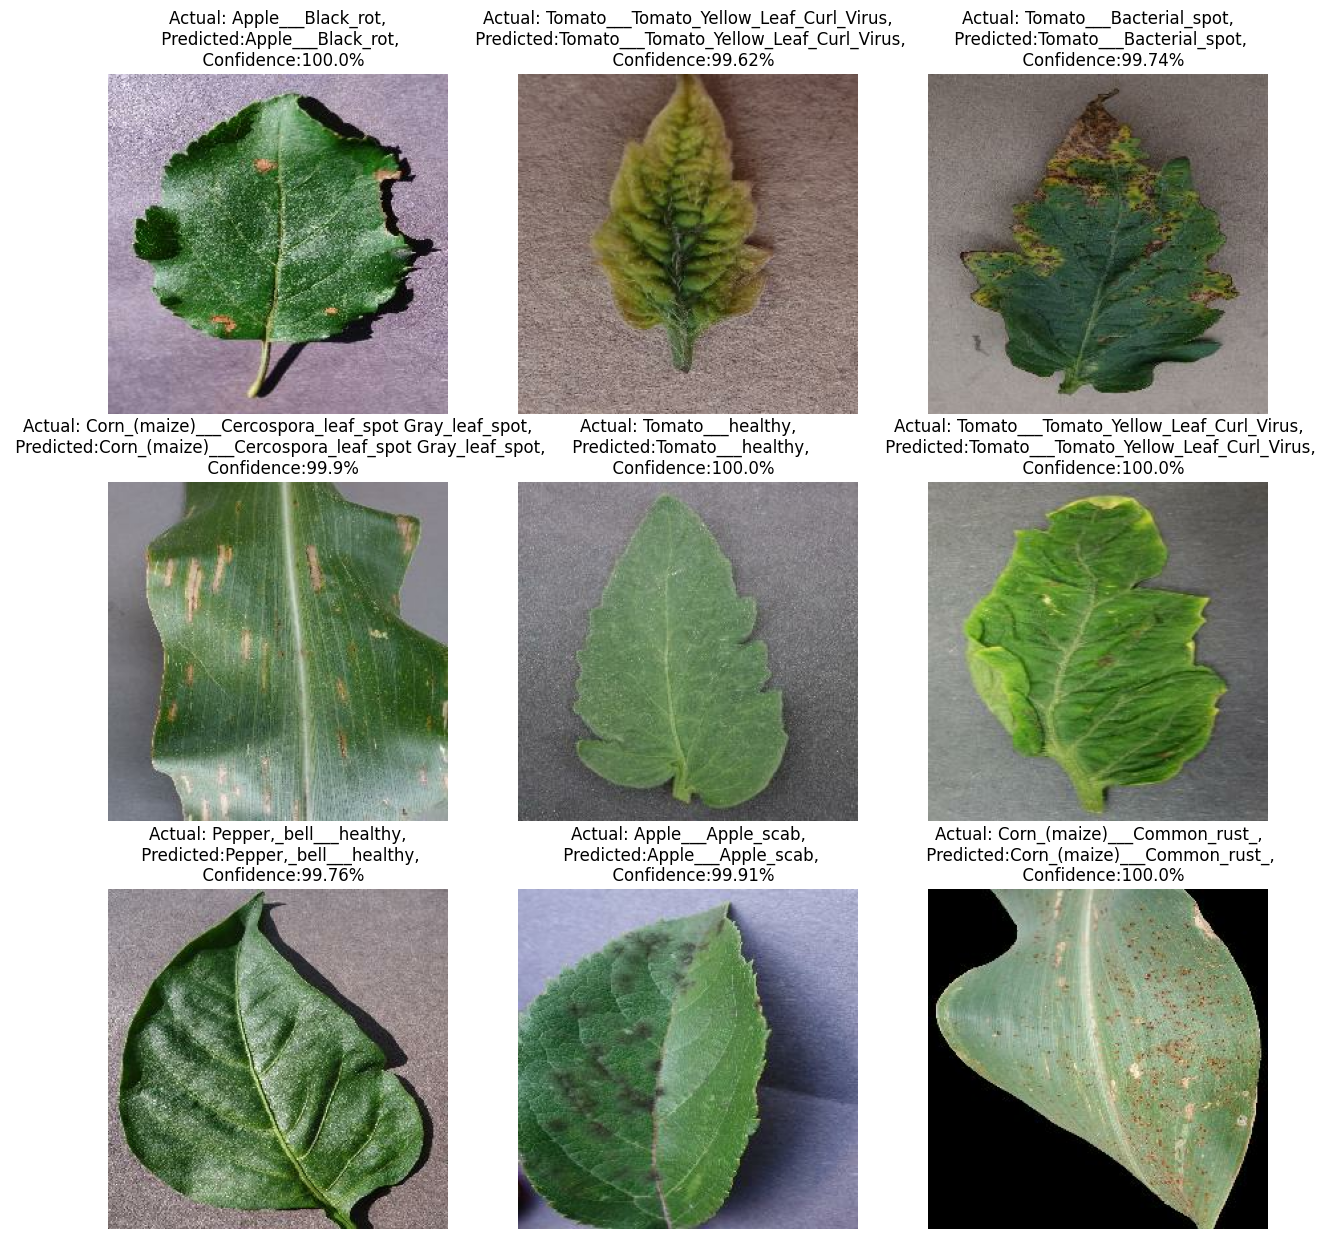

In [ ]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
     for i in  range(9):
        bx=plt.subplot(3,3, i+1)
        plt.axis("off")
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = prediction(model,images[i].numpy())
        actual_class= class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\n  Confidence:{confidence}%")

In [ ]:
model_version='plant_model_2'
model.save(f"C:/Users/ZBOOK 15 G3/Downloads/project/porfoloi_project/{model_version}") 

INFO:tensorflow:Assets written to: C:/Users/ZBOOK 15 G3/Downloads/project/porfoloi_project/plant_model_2\assets


INFO:tensorflow:Assets written to: C:/Users/ZBOOK 15 G3/Downloads/project/porfoloi_project/plant_model_2\assets


In [ ]:
from tensorflow.keras.models import load_model

In [7]:
loaded_model=load_model('C:/Users/ZBOOK 15 G3/Downloads/project/porfoloi_project/plant_model_2.pb')

OSError: No file or directory found at C:/Users/ZBOOK 15 G3/Downloads/project/porfoloi_project/plant_model_2.pb

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

New_Model = tf.keras.models.load_model('C:/Users/ZBOOK 15 G3/Downloads/project/porfoloi_project/plant_model_2') # Loading the Tensorflow Saved Model (PB)
print(New_Model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                      

In [5]:
tf.keras.models.save_model(New_Model, 'Final_Model.h5') # Saving the Model in H5 Format

loaded_model_from_h5 = tf.keras.models.load_model('final_Model.h5') # Loading the H5 Saved Model
print(loaded_model_from_h5.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                      